In [20]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
from matplotlib import pyplot as plt

In [22]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/portfolio/Unsupervised/K_mean/cluster_data.csv")
X1 = np.array(df["Feature 1"])
X2 = np.array(df["Feature 2"])

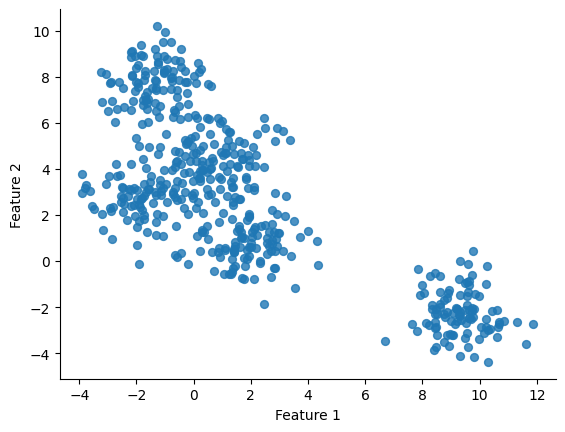

In [23]:
# @title Feature 1 vs Feature 2


df.plot(kind='scatter', x='Feature 1', y='Feature 2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
cx1 = []
cx2 = []
k=3
m = len(X1)
for i in range(k):
  x1 = random.uniform(-4,12)
  x2 = random.uniform(-4,10)
  cx1.append(x1)
  cx2.append(x2)
print(cx1,cx2)

[-0.989478511377941, 8.015686478111185, 5.578042760767069] [-0.07773689951361806, 1.2478882555833914, 0.2090297704147055]


In [29]:
def Nearpoint(k,m,X1,X2,cx1,cx2):
  tem_c = []
  C = []
  for i in range(k):
    C.append(((X1-cx1[i])**2 + (X2-cx2[i])**2)**0.5)
  C = np.argmin(C,axis=0)
  X11=[]
  X22=[]
  for i in range(k):
    Xi = 0
    X11.append((1/np.sum(C==i))*np.sum(X1[C==i]))
    X22.append((1/np.sum(C==i))*np.sum(X2[C==i]))
  return X11,X22

In [33]:
def lastpoint(k,m,X1,X2,cx1,cx2):
  lis1 = []
  while (True):
    newpoint = Nearpoint(k,m,X1,X2,cx1,cx2)
    print(newpoint)
    lis1.append(newpoint)

    if ((newpoint[0] == cx1) and(newpoint[1]==cx2)):
      return newpoint,lis1
    else:
      cx1 = newpoint[0]
      cx2 = newpoint[1]



In [34]:
# lis2 = lastpoint(k,m,X1,X2,cx1,cx2)[1]
# print(len(lis2))

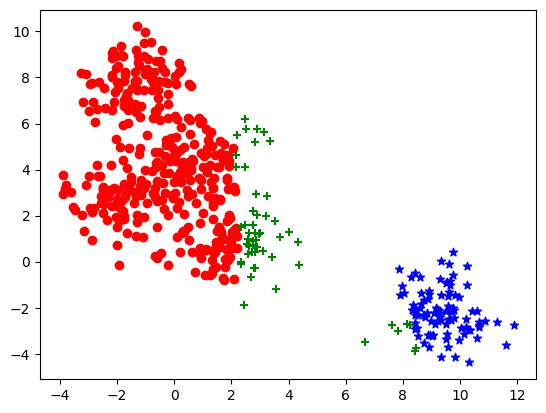

In [39]:
tem_c = []
C = []
for i in range(k):
  C.append(((X1-cx1[i])**2 + (X2-cx2[i])**2)**0.5)
C = np.argmin(C,axis=0)
tempX = X1[C==0]
tempY = X2[C==0]
plt.scatter(tempX,tempY,color = 'red',marker="o")
tempX = X1[C==1]
tempY = X2[C==1]
plt.scatter(tempX,tempY,color = 'blue',marker="*")
tempX = X1[C==2]
tempY = X2[C==2]
plt.scatter(tempX,tempY,color = 'green',marker="+")

# X11=[]
# X22=[]
# for i in range(k):
#   Xi = 0
#   X11.append((1/np.sum(C==i))*np.sum(X1[C==i]))
#   X22.append((1/np.sum(C==i))*np.sum(X2[C==i]))
# print(X11,X22)
# tem_c = []
# C = []
# for i in range(k):
#   C.append(((X1-X11[i])**2 + (X2-X22[i])**2)**0.5)
# C = np.argmin(C,axis=0)
# tempX = X1[C==0]
# tempY = X2[C==0]
# plt.scatter(tempX,tempY,color = 'red',marker="o")
# tempX = X1[C==1]
# tempY = X2[C==1]
# plt.scatter(tempX,tempY,color = 'blue',marker="*")
# tempX = X1[C==2]
# tempY = X2[C==2]
# plt.scatter(tempX,tempY,color = 'green',marker="+")

  # X11=[]
  # X22=[]
  # for i in range(k):
  #   Xi = 0
  #   X11.append((1/np.sum(C==i))*np.sum(X1[C==i]))
  #   X22.append((1/np.sum(C==i))*np.sum(X2[C==i]))

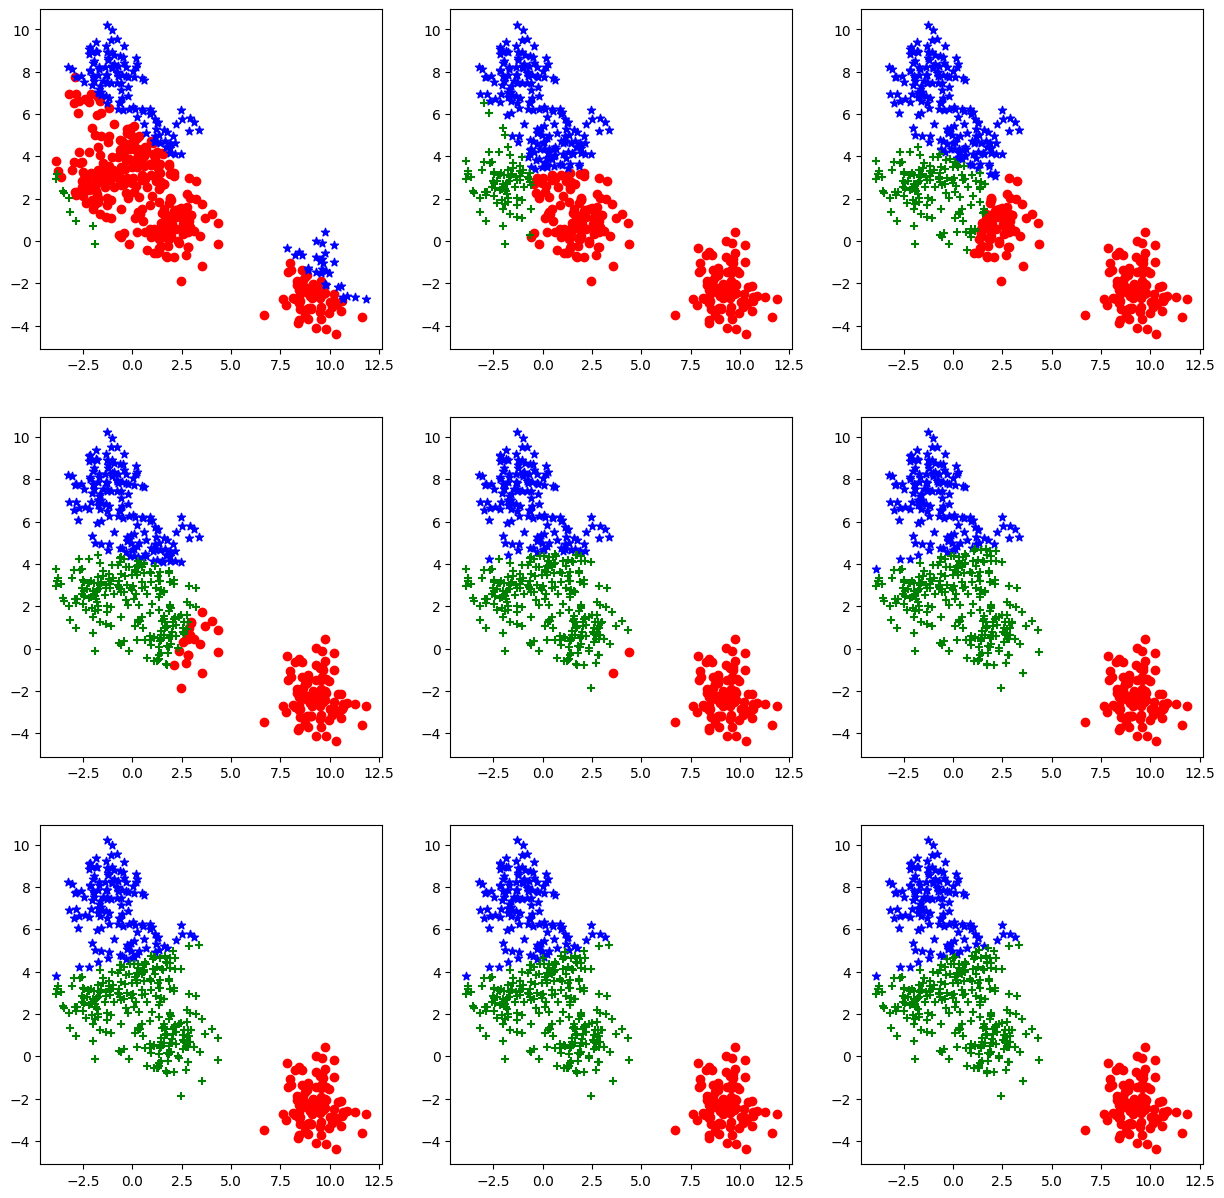

In [41]:

X11 = []
X22 = []
k=3
m = len(X1)
for i in range(k):
  x1 = random.uniform(-4,12)
  x2 = random.uniform(-4,10)
  X11.append(x1)
  X22.append(x2)
plt.figure(figsize=(15,15))
for i in range(1,10):
  plt.subplot(3,3,i)
  colors = ['red', 'blue', 'green']
  markers = ['o', '*', '+']
  C = []
  for i in range(k):
    C.append(((X1-X11[i])**2 + (X2-X22[i])**2)**0.5)
  C = np.argmin(C,axis=0)
  for j in range(k):
    tempX = X1[C==j]
    tempY = X2[C==j]
    plt.scatter(tempX,tempY,color =colors[j],marker=markers[j],label = f'plot{j}')
  X11 = []
  X22 = []
  for i in range(k):
    Xi = 0
    X11.append((1/np.sum(C==i))*np.sum(X1[C==i]))
    X22.append((1/np.sum(C==i))*np.sum(X2[C==i]))
plt.savefig("plot4.png")  # Saves as PNG
plt.savefig("plot4.jpg")